In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

---

## Prepare gauge metadata info for Caravanification

EPSG:4326
EPSG:4326


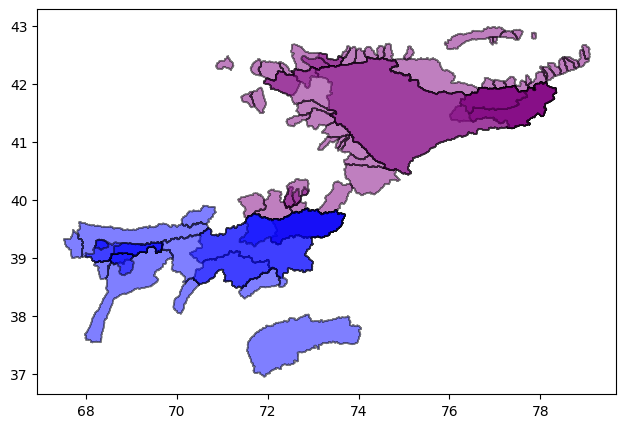

In [2]:
path_to_kgz_basins = "/Users/cooper/Desktop/CAMELS-CH/data/CA_raw/basin_outline/kyrgyzstan/HRU_KRG_ML_MODEL_BASINS_1d.shp"
path_to_tjik_basins = "/Users/cooper/Desktop/CAMELS-CH/data/CA_raw/basin_outline/tajikistan/HRU_TAJIK_ML_MODEL_BASINS_1d.shp"

kgz_basins = gpd.read_file(path_to_kgz_basins)
tjik_basins = gpd.read_file(path_to_tjik_basins)

# Print the crs
print(kgz_basins.crs)
print(tjik_basins.crs)

# To ESPG 4326
kgz_basins = kgz_basins.to_crs(epsg=4326)
tjik_basins = tjik_basins.to_crs(epsg=4326)

# Plot one on top of the other
fig, ax = plt.subplots(figsize=(10, 5))
kgz_basins.plot(ax=ax, color="purple", edgecolor="black", alpha=0.5)
tjik_basins.plot(ax=ax, color="blue", edgecolor="black", alpha=0.5)
plt.show()

In [3]:
path_to_pgkg = "/Users/cooper/Desktop/CAMELS-CH/data/CA_raw/CA-discharge.gpkg"

gpkg = gpd.read_file(path_to_pgkg)

# Create lat/lon mapping dictionaries
lat_dict = dict(zip(gpkg["CODE"], gpkg["LAT"]))
lon_dict = dict(zip(gpkg["CODE"], gpkg["LON"]))
country_dict = dict(zip(gpkg["CODE"], gpkg["COUNTRY"]))

# Add lat/lon columns to basin dataframes
kgz_basins["LAT"] = kgz_basins["CODE"].map(lat_dict)
kgz_basins["LON"] = kgz_basins["CODE"].map(lon_dict)
kgz_basins["COUNTRY"] = kgz_basins["CODE"].map(country_dict)

tjik_basins["LAT"] = tjik_basins["CODE"].map(lat_dict)
tjik_basins["LON"] = tjik_basins["CODE"].map(lon_dict)
tjik_basins["COUNTRY"] = tjik_basins["CODE"].map(country_dict)

column_rename = {
    "CODE": "gauge_id",
    "LAT": "gauge_lat",
    "LON": "gauge_lon",
    "COUNTRY": "country",
}

country_mapping = {
    "KYG": "Kyrgyzstan",
    "TAJ": "Tajikistan",
}

kgz_basins = kgz_basins.rename(columns=column_rename)
tjik_basins = tjik_basins.rename(columns=column_rename)

kgz_basins["country"] = kgz_basins["country"].map(country_mapping)
tjik_basins["country"] = tjik_basins["country"].map(country_mapping)

# Create gauge_name from gauge_id and country
kgz_basins["gauge_name"] = (
    kgz_basins["gauge_id"].astype(str) + "_" + kgz_basins["country"]
)
tjik_basins["gauge_name"] = (
    tjik_basins["gauge_id"].astype(str) + "_" + tjik_basins["country"]
)

columns_to_keep = ["gauge_id", "gauge_lat", "gauge_lon", "country", "gauge_name"]
kgz_basins = kgz_basins[columns_to_keep]
tjik_basins = tjik_basins[columns_to_keep]

# Merge the two geo dataframes
merged_basins = pd.concat([kgz_basins, tjik_basins])
merged_basins = merged_basins.dropna()

# Set index to gauge_id
merged_basins = merged_basins.set_index("gauge_id")

/Users/cooper/Desktop/CAMELS-CH/.venv/lib/python3.12/site-packages/pyogrio/geopandas.py:265: UserWarning: More than one layer found in 'CA-discharge.gpkg': 'gauges' (default), 'basins', 'basin_attributes', 'quality_flags', 'basin_attribute_description', 'discharge_time_series'. Specify layer parameter to avoid this warning.
  result = read_func(


In [4]:
merged_basins.to_csv(
    "/Users/cooper/Desktop/CAMELS-CH/data/CA_raw/CA_gauge_metadata_info.csv"
)

## Prepare streamflow data for Caravanification

In [5]:
path_to_kgz_streamflow = (
    "/Users/cooper/Desktop/CAMELS-CH/data/CA_raw/discharge/KYRGYZSTAN_streamflow.csv"
)
path_to_tjik_streamflow = (
    "/Users/cooper/Desktop/CAMELS-CH/data/CA_raw/discharge/TAJIKISTAN_streamflow.csv"
)

kgz_streamflow = pd.read_csv(path_to_kgz_streamflow)
tjik_streamflow = pd.read_csv(path_to_tjik_streamflow)

In [6]:
def convert_discharge_to_mm_per_day(discharge: float, area: float) -> float:
    """Takes discharge in m3/d and converts to mm/d

    Parameters:
        discharge (float): discharge in m3/d
        area (float): area in km2

    Returns:
        float: discharge in mm/d
    """

    return discharge / (area * 1000)


path_to_kgz_basins = "/Users/cooper/Desktop/CAMELS-CH/data/CA_raw/basin_outline/kyrgyzstan/HRU_KRG_ML_MODEL_BASINS_1d.shp"
path_to_tjik_basins = "/Users/cooper/Desktop/CAMELS-CH/data/CA_raw/basin_outline/tajikistan/HRU_TAJIK_ML_MODEL_BASINS_1d.shp"

kgz_basins = gpd.read_file(path_to_kgz_basins)
tjik_basins = gpd.read_file(path_to_tjik_basins)

In [7]:
tjik_streamflow

,date,code,discharge,name
0,1940-01-01,17082,108.0,Vakhsh-Garm
1,1940-01-02,17082,102.0,Vakhsh-Garm
2,1940-01-03,17082,108.0,Vakhsh-Garm
3,1940-01-04,17082,116.0,Vakhsh-Garm
4,1940-01-05,17082,113.0,Vakhsh-Garm
...,...,...,...,...
477976,2023-12-27,17453,20.1,Vanj-Bichharv
477977,2023-12-28,17453,19.8,Vanj-Bichharv
477978,2023-12-29,17453,19.8,Vanj-Bichharv
477979,2023-12-30,17453,19.8,Vanj-Bichharv


In [8]:
kgz_streamflow

,Unnamed: 0,date,discharge,code,river,NAME_ENG
0,0,2000-01-02,1.9,15013,р.Джыргалан-с.Советское,Dzhyrgalan - Soviet
1,1,2000-01-03,1.9,15013,р.Джыргалан-с.Советское,Dzhyrgalan - Soviet
2,2,2000-01-04,1.9,15013,р.Джыргалан-с.Советское,Dzhyrgalan - Soviet
3,3,2000-01-05,1.9,15013,р.Джыргалан-с.Советское,Dzhyrgalan - Soviet
4,4,2000-01-06,1.9,15013,р.Джыргалан-с.Советское,Dzhyrgalan - Soviet
...,...,...,...,...,...,...
551764,551764,2023-10-26,221.0,16936,Toktogul Inflow,Inflow to Toktogul reservoir
551765,551765,2023-10-27,249.0,16936,Toktogul Inflow,Inflow to Toktogul reservoir
551766,551766,2023-10-28,257.0,16936,Toktogul Inflow,Inflow to Toktogul reservoir
551767,551767,2023-10-29,184.0,16936,Toktogul Inflow,Inflow to Toktogul reservoir


In [9]:
def process_discharge_data(streamflow_df, basins_gdf):
    # Convert to projected CRS (e.g. UTM) for accurate area calculation
    basins_proj = basins_gdf.to_crs(epsg=32642)  # UTM zone 42N for Central Asia

    basins_df = basins_proj[["CODE", "geometry"]].copy()
    basins_df["CODE"] = basins_df["CODE"].astype(int)
    basins_df["area_km2"] = basins_df.geometry.area / 1e6

    print(f"Min area: {min(basins_df['area_km2'])} km²")
    print(f"Max area: {max(basins_df['area_km2'])} km²")

    streamflow_df["code"] = streamflow_df["code"].astype(int)
    df = streamflow_df.merge(
        basins_df[["CODE", "area_km2"]], left_on="code", right_on="CODE"
    )

    df["discharge_spec"] = df.apply(
        lambda x: convert_discharge_to_mm_per_day(
            x["discharge"] * 86400, x["area_km2"]
        ),
        axis=1,
    )

    df["gauge_id"] = df["code"].astype(str)

    return df[["date", "gauge_id", "discharge", "discharge_spec"]]


# Process each country
kgz_processed = process_discharge_data(kgz_streamflow, kgz_basins)
tjik_processed = process_discharge_data(tjik_streamflow, tjik_basins)

# Merge the two dataframes
merged_processed = pd.concat([kgz_processed, tjik_processed])

Min area: 73.72999999999602 km²
Max area: 52409.75000000001 km²
Min area: 336.75999999999414 km²
Max area: 29230.200000000044 km²


In [10]:
merged_processed

,date,gauge_id,discharge,discharge_spec
0,2000-01-02,15013,1.9,0.633162
1,2000-01-03,15013,1.9,0.633162
2,2000-01-04,15013,1.9,0.633162
3,2000-01-05,15013,1.9,0.633162
4,2000-01-06,15013,1.9,0.633162
...,...,...,...,...
449030,2023-12-27,17453,20.1,0.875433
449031,2023-12-28,17453,19.8,0.862367
449032,2023-12-29,17453,19.8,0.862367
449033,2023-12-30,17453,19.8,0.862367


In [ ]:
# 1. Filter dates from 2000 onwards
merged_processed_filtered = merged_processed[merged_processed["date"] >= "2000-01-01"]


# 2. Handle duplicates
def get_first_valid(group):
    # Sort by discharge_spec to get NaN values last
    group = group.sort_values("discharge_spec", na_position="last")
    # Return the first row (which will be non-NaN if any exist)
    return group.iloc[0]


# Group by date and gauge_id, apply the function
merged_processed_cleaned = merged_processed_filtered.groupby(
    ["date", "gauge_id"], as_index=False
).apply(get_first_valid)

# 3. Pivot the table
merged_processed_pivoted = merged_processed_cleaned.pivot(
    index="date", columns="gauge_id", values="discharge_spec"
)

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x105110170>>
Traceback (most recent call last):
  File "/Users/cooper/Desktop/CAMELS-CH/.venv/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


In [ ]:
# To CSV
merged_processed_pivoted.to_csv(
    "/Users/cooper/Desktop/CAMELS-CH/data/CA_raw/CA_streamflow_for_caravan.csv"
)

In [ ]:
def check_duplicates(df):
    """
    Check for duplicates in a dataframe based on date and gauge_id combinations.
    Returns information about duplicate entries.

    Parameters:
    df (pandas.DataFrame): DataFrame with 'date' and 'gauge_id' columns

    Returns:
    tuple: (duplicate_counts, duplicate_examples)
    """
    # Check for duplicates based on date and gauge_id combination
    duplicates = df.groupby(["date", "gauge_id"]).size().reset_index(name="count")
    duplicate_rows = duplicates[duplicates["count"] > 1]

    # Get example records for each duplicate combination
    if not duplicate_rows.empty:
        example_duplicates = pd.DataFrame()
        for _, row in duplicate_rows.iterrows():
            mask = (df["date"] == row["date"]) & (df["gauge_id"] == row["gauge_id"])
            example_duplicates = pd.concat([example_duplicates, df[mask]])
    else:
        example_duplicates = pd.DataFrame()

    return duplicate_rows, example_duplicates


# Get duplicate information
duplicate_counts, duplicate_examples = check_duplicates(merged_processed)

# Print summary
print("\nDuplicate combinations found:")
print(duplicate_counts)

print("\nExample duplicate records:")
print(duplicate_examples.sort_values(["date", "gauge_id"]))

# Get total number of duplicate combinations
total_duplicates = len(duplicate_counts)
print(
    f"\nTotal number of date-gauge_id combinations with duplicates: {total_duplicates}"
)

## Prepare basins shapefiles for Google Earth Engine

In [ ]:
path_to_kgz_basins = "/Users/cooper/Desktop/CAMELS-CH/data/CA_raw/basin_outline/kyrgyzstan/HRU_KRG_ML_MODEL_BASINS_1d.shp"
path_to_tjik_basins = "/Users/cooper/Desktop/CAMELS-CH/data/CA_raw/basin_outline/tajikistan/HRU_TAJIK_ML_MODEL_BASINS_1d.shp"

kgz_basins = gpd.read_file(path_to_kgz_basins)
tjik_basins = gpd.read_file(path_to_tjik_basins)

rename_mapping = {
    "CODE": "gauge_id",
}

kgz_basins = kgz_basins.rename(columns=rename_mapping)
tjik_basins = tjik_basins.rename(columns=rename_mapping)

columns_to_keep = ["gauge_id", "geometry"]

kgz_basins = kgz_basins[columns_to_keep]
tjik_basins = tjik_basins[columns_to_keep]

# Merge the two geo dataframes
merged_basins = pd.concat([kgz_basins, tjik_basins])

# Save as shapefile
output_path = "/Users/cooper/Desktop/CAMELS-CH/data/CA_raw/CA_basins_for_gee.shp"

# Print crs
print(merged_basins.crs)

merged_basins.to_file(output_path)

In [ ]:
# Plot the basins
fig, ax = plt.subplots(figsize=(10, 5))
merged_basins.plot(ax=ax, color="blue", edgecolor="black", alpha=0.5)
plt.show()